In [89]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots we will create

pd.options.mode.chained_assignment = None

#read in the data
df = pd.read_csv('D:\Data Analayst Data\movies.csv\movies.csv')


In [8]:
#lets look at the data
# df.head()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [10]:
#let see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [11]:
#data types for out columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# change data types of columns
df['budget'] = df['budget'].fillna(0)
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].fillna(0) #rubah kolom menjadi 0
df['gross'] = df['gross'].astype('int64')

In [17]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [ ]:
df

In [ ]:
#create correct year column

# df['yearcorrect'] = df['released'].astype(str).str[0:4]
# df['yearcorrect'] = df['released'].str.split(',').str[1]
df['yearcorrect'] = df['released'].str.extract('(\d{4})', expand=False)

# df['yearcorrect']
df

In [68]:
df = df.sort_values(by=['gross'],inplace=False, ascending=False)

In [65]:
# pd.set_option('display.max_rows',None)
pd.reset_option('display.max_rows')

In [ ]:
# drop any duplicates
# df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()
# df['company'].sort_values(ascending=False)

In [66]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1981,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [ ]:
#budget high correlation
#company high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

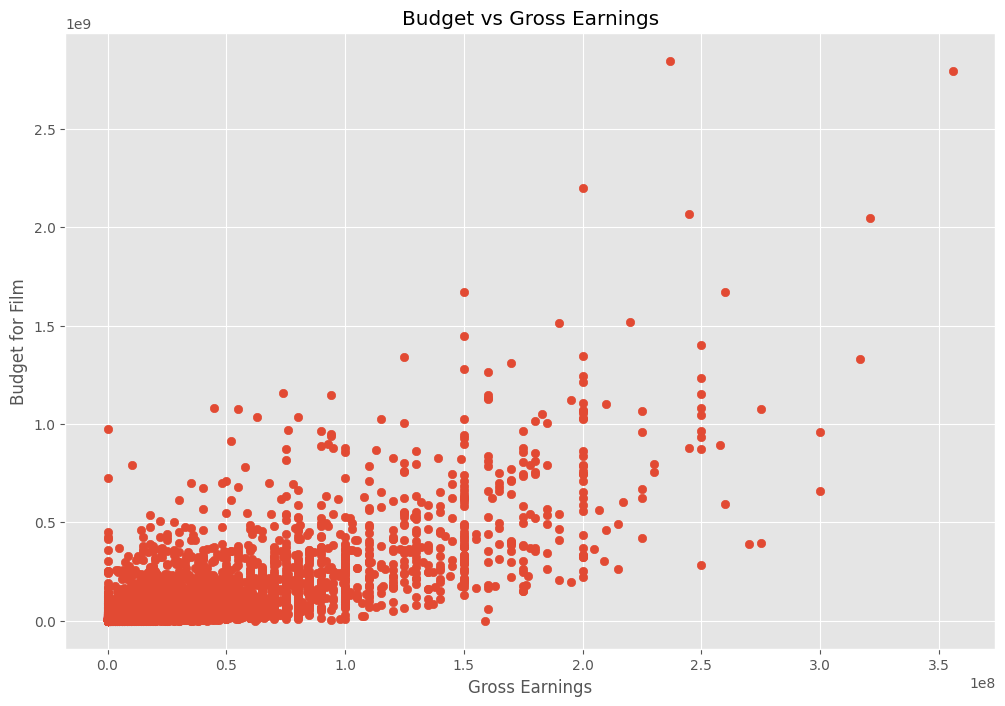

In [70]:
#scatter plot with bughet vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show

In [ ]:
# df.head()
df

<Axes: xlabel='budget', ylabel='gross'>

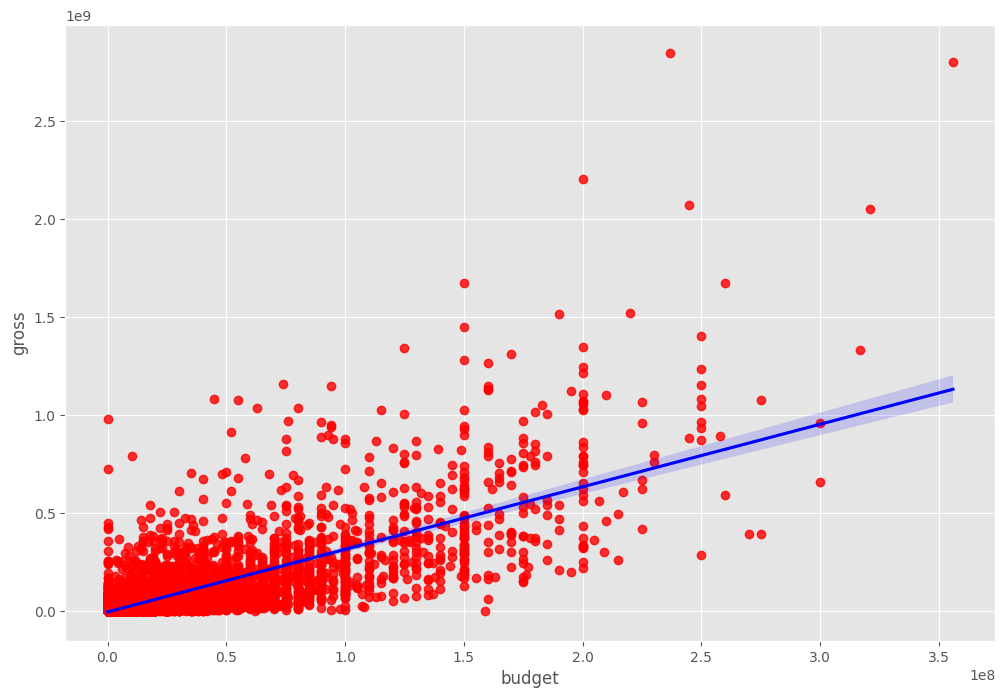

In [74]:
# plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [79]:
# lets start looking at correlation
df.corr(method='pearson') #pearson, kendall, spearman

C:\Users\User\AppData\Local\Temp\ipykernel_29524\2130415390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson, kendall, spearman


,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_29524\3801978249.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matirx = df.corr(method='pearson')


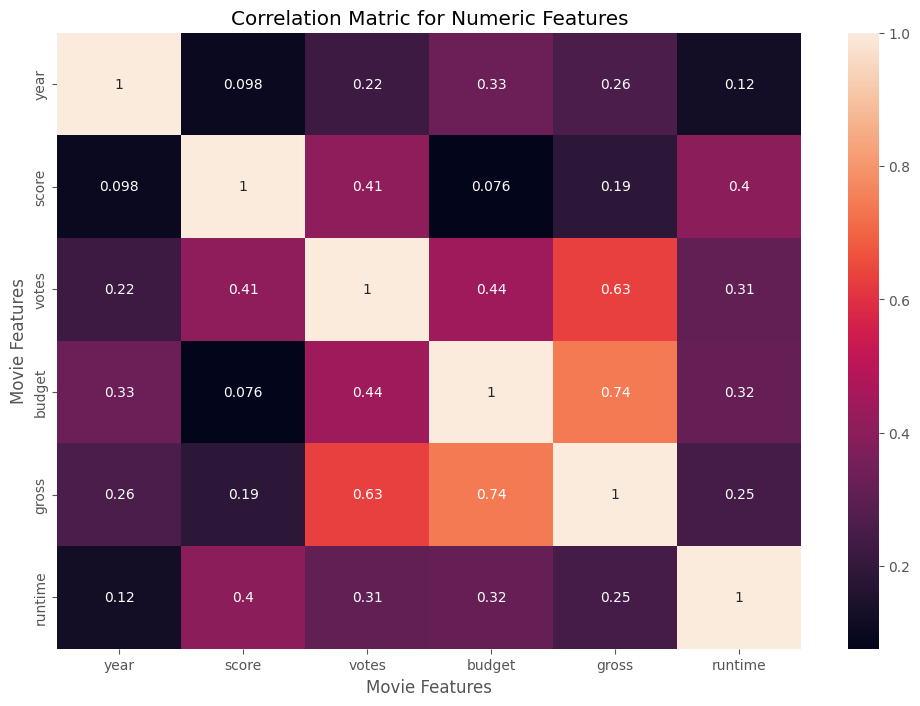

In [91]:
#high correlation between budget and gross RIGHT
correlation_matirx = df.corr(method='pearson')
sns.heatmap(correlation_matirx, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [87]:
# looks at company
df.head()
# df.dtypes

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [88]:
# menjadikan semuanya isi df menjadi numerik untuk perbandingan
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38
7480,6194,4,2,39,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,39
6653,2969,5,0,35,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,35
6043,5502,5,0,32,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,32
6646,2145,5,0,35,221,7.1,370000.0,1189,706,2721,55,190000000,1515341399,2281,137.0,35
7494,2131,4,2,39,2676,6.8,148000.0,432,1950,1527,55,150000000,1450026933,2315,103.0,39


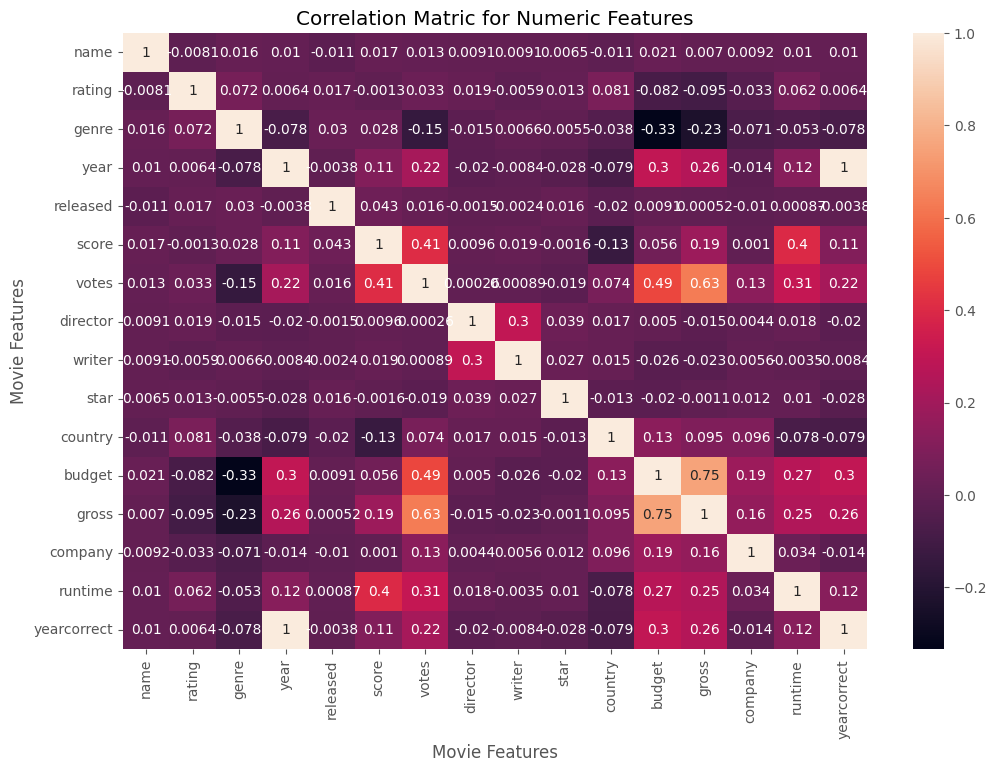

In [92]:
correlation_matirx = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matirx, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [93]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.010225,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.006403,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.078210,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078210
year,0.010225,0.006403,-0.078210,1.000000,-0.003775,0.106295,0.218289,-0.020385,-0.008391,-0.027606,-0.079009,0.300236,0.255130,-0.014144,0.120636,1.000000
released,-0.011311,0.016613,0.029822,-0.003775,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.106295,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.218289,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020385,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008391,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027606,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027606


In [94]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_matirx.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.010225
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.006403
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [95]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.133348
score        country       -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
country      year          -0.079009
year         country       -0.079009
country      yearcorrect   -0.079009
yearcorrect  country       -0.079009
country      runtime       -0.078412
runtime      country       -0.078412
genre        yearcorrect   -0.078210
yearcorrect  genre         -0.078210
year         genre         -0.078210
genre        year          -0.078210
company      genre         -0.071067
genre        company       -0.071067
             runtime       -0.052711
runtime      genre         -0.052711
country      genre         -0.037615
g

In [97]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross        votes          0.632834
votes        gross          0.632834
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  year           1.000000
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         yearcorrect    1.000000
             year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Voted and Budget have the highest correlation to gross earnings

#company has low correlation